# Importing the required libraries and dataset
Here we are working with California housing dataset instead of the more commonly used Boston housing dataset because sklearn web page mentiones that Boston housing dataset has ethical problems and that it should not be used. Please refer to [scikit-learn](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html) for clarity.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [5]:
print(california)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [6]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
california.target_names

['MedHouseVal']

In [10]:
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MEDV'] = california.target

In [11]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df_california.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

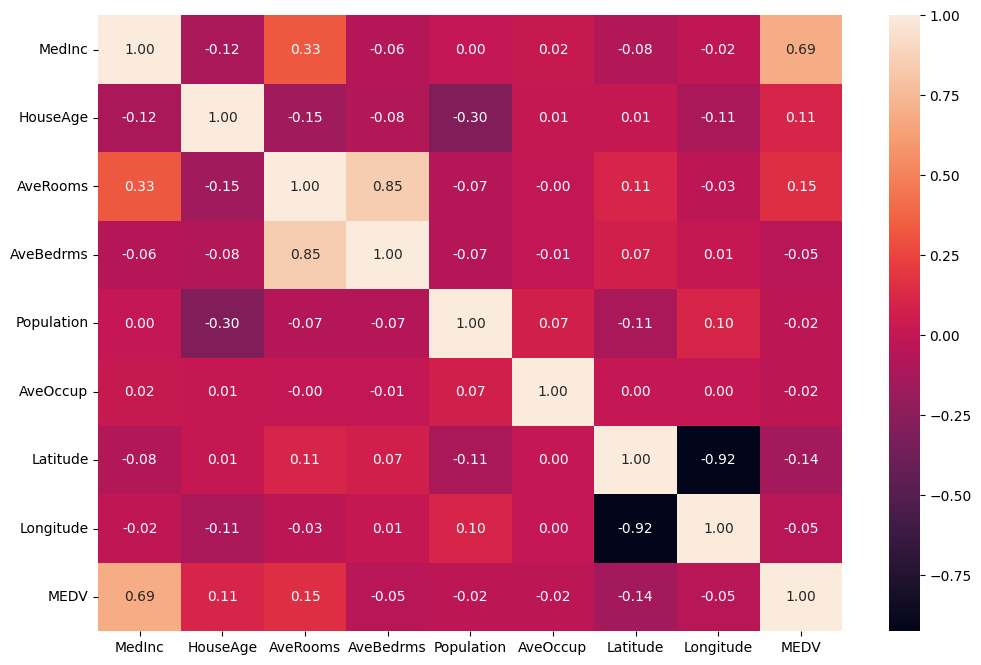

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df_california.corr(), annot=True, fmt=".2f")
plt.show()

In [19]:
#Linear Regression

X = df_california['MedInc'].values.reshape(-1,1)
y = df_california['MEDV'].values

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [24]:
model.coef_

array([0.41793849])

In [22]:
model.intercept_

0.45085576703267694

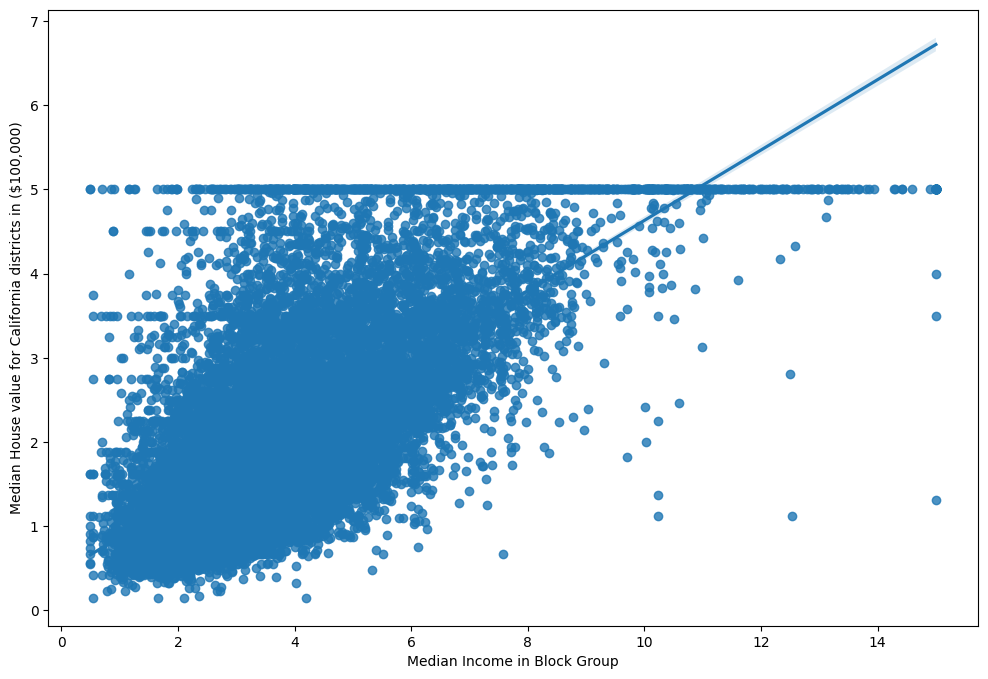

In [27]:
plt.figure(figsize=(12,8));
sns.regplot(x=X, y=y);
plt.xlabel('Median Income in Block Group')
plt.ylabel("Median House value for California districts in ($100,000)")
plt.show();

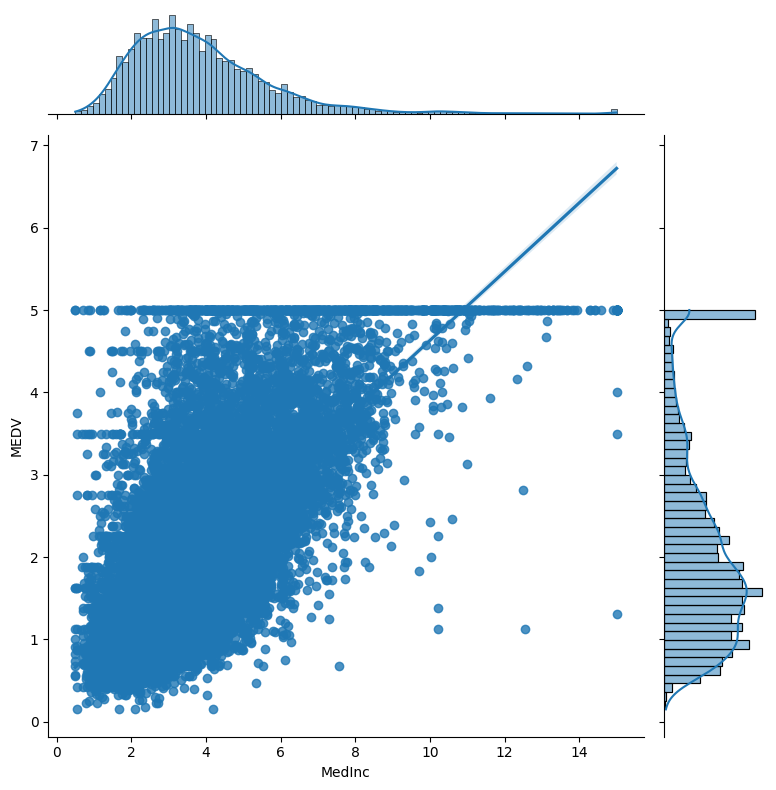

In [28]:
sns.jointplot(x='MedInc', y='MEDV', data=df_california, kind='reg', height=8);
plt.show();

In [29]:
import statsmodels.api as sm

In [35]:
y = df_california['MEDV']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.357e+05
Date:                Thu, 11 Apr 2024   Prob (F-statistic):                        0.00
Time:                        18:52:15   Log-Likelihood:                         -26188.
No. Observations:               20640   AIC:                                  5.238e+04
Df Residuals:                   20639   BIC:                                  5.239e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5118      0.001    368.395      0.000       0.509       0.515
==============================================================================
Omnibus:                     3633.023   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9249.629
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       5.638   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Omnibus, Skewness, Kurtosis, and JB (Jarque-Bera): These statistics are related to the normality of residuals. 
# A significant Omnibus value (3633.023) and JB value (9249.629) suggest that the residuals may not be normally distributed.

# Durbin-Watson: The Durbin-Watson statistic (0.795) tests for the presence of autocorrelation in the residuals. 
# A value close to 2 suggests no significant autocorrelation. Here, the value is lower (0.795), indicating a potential issue with autocorrelation.

In [41]:
residuals = results.resid

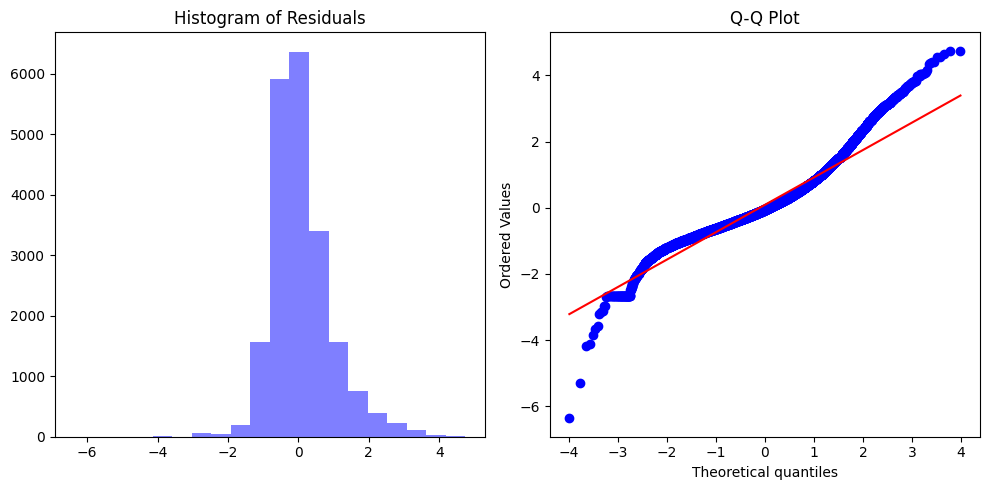

In [42]:
import scipy.stats as stats

# Assuming 'residuals' contains the residual values from the regression model
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.title('Histogram of Residuals')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [43]:
from scipy.stats import shapiro

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_test[1])

Shapiro-Wilk Test p-value: 0.0


/Users/aseemsingh/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 1000x500 with 0 Axes>

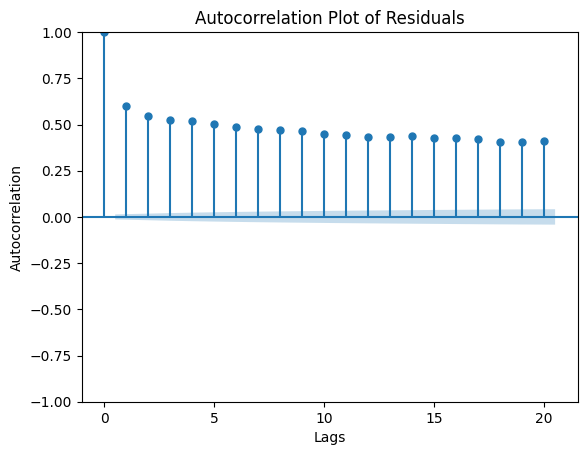

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'residuals' contains the residual values from the regression model
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=20)
plt.title('Autocorrelation Plot of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Performance Evaluation of Simple Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split